## Contents

* [How flow can you go?](#flow)
* [For loops](#for)
    * [A warning about arange](#arange)
    * [Examples](#examples)
* [Sums](#sums)
* [If statements](#if)



* [Exercises](Logical Flow- Exercises.ipynb)

<a id='flow'></a>
# How flow can you go?

So far we've seen python do some things which we could never have done by hand- constructing large matrices and vectors, plotting thousands of points, etc. already make python a useful tool. However, there's another fundamental aspect of computer programming that we haven't even addressed yet, and it's what makes computer programs useful in most real world operations. 

When we looked at vectors, we saw how python can treat a list of numbers all in one go, instead of doing them one at a time. Occasionally however, we come across problems where we need to go step by step. Take the simple example of calculating the terms of the series $T_n=T_{n-1}^2-3$, where $T_0=1$. Clearly $T_1$ depends on $T_0$, $T_2$ depends on $T_1$ and so forth, so we need to calculate the terms in turn, so that we can calculate successive terms.

Another simple operation we perform in our minds all the time is making either/or decisions. Suppose we have a function  

  $$f(x)= \begin{cases}
    \frac{x^2-x}{x},& \text{if } x\geq 1\\
    0,              & \text{otherwise}
\end{cases}
$$

clearly we have to make a decision about which form of the function we use based on the value of x. I.E *"if x is 1 or bigger do this, otherwise do that"*.

Both of these examples demonstrate what we think of as logical flow. By default python starts with the first command you execute, and then reads down through your code, executing each statement it reads. When we need to repeatedly do execute some steps, we use a so-called **for** loop, i.e. 

    for <some condition> --> do these steps

and if we want to performs something only under certain conditions we use a so-called **if** statement, i.e.

    if <condition is true> --> do this
    otherwise --> do that
    
    

<a id='for'></a>
## For-loops

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

//anaconda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
//anaconda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


The basic syntax for a for-loop is

    for <iterator> in <set_of_values>: 
        <command 1>
        <command 2>
        <command 3>
        
    <normal command>
    
Just like with function definitions, python considers everything indented under the ````for ... :```` statement (the colon is required) to be part of the loop. Hence in the example above, ````<command 1>, <command 2>```` and ````<commmand 3>```` all get executed repeatedly 'inside' the loop, while ````<normal command>```` just gets executed once at the end, because it is 'outside' the loop.

The ````<iterator>```` is the variable which changes each time we loop around. It is common to use ````i```` for this variable, as this is also common in mathematical notation: i.e. $\sum\limits_{i=1}^{10}$. I prefer to use ````ii```` because if your searching through a big piece of code ````i```` will appear in a lot of places- inside other words or variables, whereas ````ii```` will only appear where you've used it as an iterator. All of my examples will use ````ii```` but you can use whatever name you like.

The ````<set_of_values>```` is just that- a set of values. We can use the elements of an array defined using numpy commands like ````linspace````, or ````arange````, or just use simple arrays in square brackets like ````[1,2,3,4]````. 

Let's put that all into a simple example

In [2]:
for ii in [1,2,3]:
    print('hello')

hello
hello
hello


In [4]:
for ii in [1,2,3]:
    print(ii)

1
2
3


When python sees the ````for```` keyword, it takes the first value of the iterator (````ii=1````) and then executes all the commands in the for loop, then goes back, updates the iterator (````ii=2````), and performs the commands again etc. In this example, we haven't actually used the value of the iterator, but change the command from ````print('hello')```` to ````print(ii)```` and you'll see how the value changes each time we go through the loop (Note: Do not put the ii inside speech marks as it will just print the text ii. 

In [5]:
for name in ['peter','paul','percy']:
    print('hello',name)

hello peter
hello paul
hello percy


<a id='arange'></a>
### A Warning about arange...

We will use the numpy command '````np.arange````' to generate iterators for us. This command builds a list of integers (it can also do reals, but by default it uses integers which is good practice): an array. So ````np.arange(1,10)```` builds an array of numbers between 1 and 10 with the default spacing of 1, i.e.

In [6]:
np.arange(1,10)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

but what you should notice is that "10" isn't included in the list. **So ````np.arange```` builds arrays up to, but not including the upper limit**. To build an array with the integers 1 to 10 in it we should instead use

In [7]:
np.arange(1,11)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

and for completeness we could add in the spacing we want ````arange(1,11,1)````. Note also, we don't have to start at 1, in fact the default is to start at 0, if you leave out the lower limit this is what arange does:

In [8]:
np.arange(11)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

Note that you can use non-integer iterators- we did it with the ````name in ['peter','paul','percy']```` example above, but we can also use real numbers

In [6]:
np.arange(0,10,0.5)

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5])

In [10]:
for ii in np.arange(0,10,0.5):
    print(ii+1)

1.0
1.5
2.0
2.5
3.0
3.5
4.0
4.5
5.0
5.5
6.0
6.5
7.0
7.5
8.0
8.5
9.0
9.5
10.0
10.5


<a id='examples'></a>
### Some more examples 

Let's take the example from the introduction: we have a series defined by $$T_n=T_{n-1}^2-3$$ and $T_0=1$. Let's say we want the value of $T_{100}$, we can implement this as follows:

In [11]:
T0=1
previous_term=T0
upper_limit=100
for ii in np.arange(1,upper_limit+1): # remember arange doesn't include the upper limit, so this does up to 100 and stops
    term=previous_term**2-3 # calculate the new term using the previous term
    previous_term=term      # update the value of the previous term for the next iteration
    
print('T',upper_limit, 'is', term)

T 100 is 1


Now this is easily verified, because if you work out the second term, it's $T_1=1^2-3=-2$. Then the next term is $T_2=(-2)^2-3=1$, so the series just oscillates back and forth between 1 and -2. Hence the 100th term is $1$ as given by our code. Verify this by changing the upper_limit variable in the code above. Also, try changing the code so that instead of printing out only the last term, on each step the code prints out the value so for an upper limit of 3 you would get back

    T 1 is -2
    T 2 is 1
    T 3 is -2


In [13]:
T0=1
previous_term=T0
upper_limit=10
for ii in np.arange(1,upper_limit+1): # remember arange doesn't include the upper limit, so this does up to 100 and stops
    term=previous_term**2-3 # calculate the new term using the previous term
    previous_term=term      # update the value of the previous term for the next iteration
    print('T',ii, 'is', term)

T 1 is -2
T 2 is 1
T 3 is -2
T 4 is 1
T 5 is -2
T 6 is 1
T 7 is -2
T 8 is 1
T 9 is -2
T 10 is 1


##### Poisson Distribution

The Possion probability mass function is defined as follows. Consider a discrete random variable $X$ that can have the values $0,1,2,3,\ldots$. The probability that $X=k$ is given by $$P(X=k) = e^{-\lambda}\frac{\lambda ^k}{k!} \quad \quad  \mbox{  for  } k=1,2,3,\ldots,$$

for some given $\lambda$.

Such a distribution describes, among other things, the number of Geiger clicks per minute for a small sample of radioactive material, the number of car accidents on a stretch of road in one hour, and the number of goals scored in a football match. 

We will use a for-loop to calculate the probability of $X=k$ for the first few k, and plot the probabilities so we can see the shape of the distribution. We choose a value of $\lambda=2$, and we will calculate the probability for $X=0,1,2,\ldots,10$.

(Note that the numpy library does not include a function to calculate factorials. Hence we will import the math library which does)

<IPython.core.display.Javascript object>


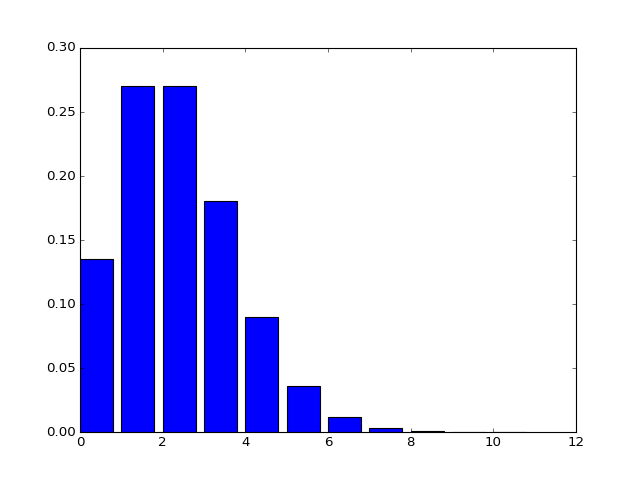

<Container object of 11 artists>

In [21]:
import math as mth

#Define parameters

lmda=2.0
n_max=10

#Set up the vectors

x=np.arange(n_max+1)    # sets up the vector [0,1,2,...10]
prob=np.zeros(n_max+1)  # sets up the empty vector to contain the probabilities

#Use the formula to calculate probabilities one by one

for ii in x:         # ii takes each value in x in turn
    prob[ii]=np.exp(-lmda)*(lmda**ii)/mth.factorial(ii)
    
#Plot a bar chart of the probabilities
plt.bar(x,prob)

Play with the parameter ````lmda```` to see how it affects the distribution, can you tell by looking at the distribution it what it represents? With lambda around 5.5, Poisson distribution has a bell shaped distribution.

<a id='sums'></a>
## Sums

One use of for loops is to compute sums. A good way to think of this is that we start off with an empty container, and on each iteration of our loop we add the next term in our sum. Consider as an example the geometric series: 

$$ S_n= \sum \limits _{r=0} ^{n} x^r $$

Suppose we have $n=10$ and $x=0.1$. Let's apply the idea of the empty container. First, let's set up the container, and make sure it's empty:

    S=0
    
Next we will define our variables

    x=0.1
    n=10
    
Now here's the for-loop

    for ii in np.arange(n+1):
        S=S+x**ii
        
Let's walk through the loop step by step. Initially, ````S```` is ````0```` because we defined it that way above. So the first time we enter the loop, and ````ii=0````, ````S=S+x**ii```` becomes 

    S = 0 + 0.1 ** 0 = 1.0
    
When we go round the loop again, ````S```` is now ````1.0````, and ````ii```` is ````1````:

    S = 1 + 0.1 ** 1 = 1.1
    
(One more): When we go round the loop again, ````S```` is now ````1.1````, and ````ii```` is ````2````:

    S = 1.1 + 0.1 ** 2 = 1.11
    
And so we continue until we do this 11 times $(0,1,2,\ldots,10)$. And we get our final answer. Here's the whole code for you to execute:

In [23]:
S=0

x=0.1
n=10

for ii in np.arange(n+1):
    S=S+x**ii
    
print(S)

1.1111111111


A well known result is that when $x<1$ the geometric series converges to $$ S_{\infty} = \frac{1}{1-x} $$ 

Obviously we can't compute infinitely many terms (please don't try- people have in the past!), but we don't need to. The whole point of a convergent series is that you can stop adding terms when they become small enough. In our case, the answer is 1.111, correct to 3 decimal places, and you can easily verify that this doesn't change if you add more terms- try changing ````n```` in the code above. It doesn't matter how big you make it, beyond ````n=3```` the answer is always the same. 

So if we are asked to compute an infinite sum, please don't type in ````arange(100000000000000)```` or ````arange(inf)````, as some people have tried to do. Just use a large number, say 1000, and then check to see if the answer changes if you use 2000, say; and if it does, try 3000 etc, until the answer doesn't change any more. 

> Try computing the sum of the geometric series for different values of x, and see how many terms you need to include to achieve convergence to 3 decimal places.

In [26]:
S=0

x=0.8
n=3000

for ii in np.arange(n+1):
    S=S+x**ii
    
print(S)

5.0


<a id='if'></a>
## If statements

If the for-loop allows us to repeat a piece of code, the if-statement can be though of as branching the code. The basic syntax is

    if <statement_is_true>:
        <command 1>
    else:
        <command 2>
        
    <ordinary command>
    
Here again the indented code following the colon (:) is considered to be part of the if statement, and unindented code marks the end. So ````<ordinary command>```` get's executed either way. Simple example

    x=1
    if (x==1):
        print('x is 1')
        
    print('that was an if statement')
    
when python sees an if statement, it looks at the statement in brackets to see whether it is true or false. In our case we are asking if x is equal to 1- that is what the double equals sign (==) means- compare these two numbers and see if they are equal. If the statement is true (in our case it will be), then python executes all of the following commands- in our case it will print out 'x is 1'. If, on the other hand it is not true it skips the commands and moves on. So if we execute this code, it should print 

    x is 1
    that was an if loop
    
In this case we did not include an else statement. But we could just as well have added something like this

    x=2
    if (x==1):
        print('x is 1')
    else:
        print('x is not 1')
        
    print('that was an if loop')
    
In this case (note we changed the value of x), the statement is no longer true, so python executes the code following the else statement: we should get 

    x is not 1
    that was an if loop
    
Note that because ````print('that was an if loop')```` is not indented, this is considered to be an ordinary piece of code, and it executes whether the statement was true or not.

A simple way to think of this is as a flow chart 

<img src="imgs/nflowchart.png" style="width:200px">

whereby you can clearly see the 'branching' character of the logical flow. Other comparisons can be made

    if (x == y): # equal
    if (x >  y): # greater than
    if (x <  y): # less than
    if (x >= y): # greater than or equal
    if (x <= y): # less than or equal
    if (x != y): # not equal
    
    

In [27]:
x=2
if (x==1):
    print('x is 1')
else:
    print('x is not 1')

print('that was an if loop')

x is not 1
that was an if loop


Make sure you have played with all of the available code boxes in these notes to understand their function. And [then proceed to try the exercises](Logical Flow- exercises.ipynb).
Me: Below is a test for modulus.

In [28]:
np.abs(1.2)

1.2

In [29]:
np.abs(-1.2)

1.2